In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

2023-01-05 01:05:48.765182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 01:05:49.116039: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-05 01:05:49.116059: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-05 01:05:50.139449: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
train = pd.read_csv("datasets/epl_data_train_onehot.csv")
test = pd.read_csv("datasets/epl_data_test_onehot.csv")

In [4]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(5980, 31)
(5980,)


In [5]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 31)
(380,)


In [6]:
columns = X_train.shape[1]
columns

31

In [12]:
inputs = Input(shape=(columns,))
hiddens = Flatten()(inputs)
hiddens = Dense(64)(hiddens)
hiddens = Dropout(0.3)(hiddens)
hiddens = Dense(32)(hiddens)
hiddens = Dense(3)(hiddens)
outputs = Activation('softmax')(hiddens)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 31)]              0         
                                                                 
 flatten_1 (Flatten)         (None, 31)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2048      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
 activation_1 (Activation)   (None, 3)                 0   

In [13]:
history = model.fit(X_train, y_train, batch_size=16, epochs=200, validation_split=0.04)

Epoch 1/200
359/359 [==============================] - 1s 1ms/step - loss: 3.7526 - accuracy: 0.3054 - val_loss: 3.1051 - val_accuracy: 0.2625
Epoch 2/200
359/359 [==============================] - 0s 1ms/step - loss: 2.8763 - accuracy: 0.3380 - val_loss: 2.1804 - val_accuracy: 0.3083
Epoch 3/200
359/359 [==============================] - 0s 1ms/step - loss: 2.2909 - accuracy: 0.3662 - val_loss: 1.5953 - val_accuracy: 0.3542
Epoch 4/200
359/359 [==============================] - 0s 1ms/step - loss: 1.9916 - accuracy: 0.3845 - val_loss: 1.3534 - val_accuracy: 0.4042
Epoch 5/200
359/359 [==============================] - 0s 1ms/step - loss: 1.8105 - accuracy: 0.4091 - val_loss: 1.2738 - val_accuracy: 0.4375
Epoch 6/200
359/359 [==============================] - 0s 1ms/step - loss: 1.7421 - accuracy: 0.4124 - val_loss: 1.2588 - val_accuracy: 0.4583
Epoch 7/200
359/359 [==============================] - 0s 1ms/step - loss: 1.7252 - accuracy: 0.4178 - val_loss: 1.2506 - val_accuracy: 0.4833

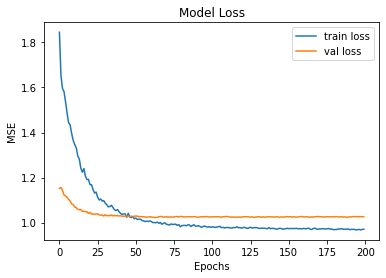

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

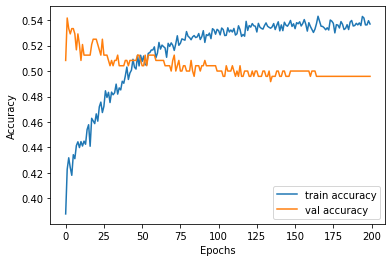

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
test_predictions = np.argmax(model.predict(X_test), axis=1)
accuracy = (test_predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test Set Accuracy:", accuracy)

12/12 [==============================] - 0s 948us/step
Test Set Accuracy: 0.5684210526315789
